1.What is the underlying concept of Support Vector Machines?

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The concept of SVM is that the algorithm creates a line or a hyperplane which separates the data into classes.

2.What is the concept of a support vector?

The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector. Since these vectors support the hyperplane, hence called a Support vector.

3.When using SVMs, why is it necessary to scale the inputs?

When using SVMs, it is necessary to scale the inputs because Support Vector Machine (SVM) optimization occurs by minimizing the decision vector w, the optimal hyperplane is influenced by the scale of the input features and it's therefore recommended that data be standardized (mean 0, var 1) prior to SVM model training.

4.When an SVM classifier classifies a case, can it output a confidence score? What about a
percentage chance?

The Confidence Score, or Classification Threshhold, indicates how certain the NLP service / machine learning model is that the respective intent has been correctly assigned. The score can have a value between 0 and 1 , depending on how the neural networks work.

For example, consider the scenario where a question in a task has three possible answers: “beef,” “chicken,” or “veggie.” The confidence would be calculated in the following three steps:
Step 1:
Sum the trust scores of the contributors responsible for each response (this is found in the worker report of a sample dataset):

a. Sum of trust(beef) = 4.4703

b. Sum of trust(chicken) = 1.8571

c. Sum of trust(veggie) = 0.9231

Step 2:
Sum the trust scores for all responding contributors:
a. Sum of trust(all) = 7.2505

Step 3: Divide each in Step 1 by Step 2 to find the confidence score for each response

a. Cofidence(beef) = Sum of trust(beef) / Sum of trust(all) = 4.4703 / 7.2505 = 0.6165

b. Cofidence(chicken) = Sum of trust(chicken) / Sum of trust(all) = 1.8571 / 7.2505 = 0.2561

c. Confidence(veggie) = Sum of trust(veggie) / Sum of trust(all) = 0.9231 / 7.2505 = 0.1273

(Note: All confidence scores on a field sum to 1)

In this scenario, the beef burito has the highest confidence score of 0.6165.

Now, the percentage chance = confidence score X 100% = 0.6165 X 100% = 61.65%

5.Should you train a model on a training set with millions of instances and hundreds of features
using the primal or dual form of the SVM problem?

This applies only to linear SVMs since kernelized can only use the dual form. The computational complexity of the primal form of the SVM problem is proportional to the number of training instances m, while the computational complexity of the dual form is proportional to a number between m² and m³. So, if there are millions of instances and hundreds of feature , we should use the primal form to train a model as the dual form will be too slow.

6.Let's say you've used an RBF kernel to train an SVM classifier, but it appears to underfit the
training collection. Is it better to raise or lower (gamma)? What about the letter C?

If we train an SVM classifier by using a Radial Basis Function (RBF) kernel, then it underfits the training set, so there might be too much regularization. To decrease it, we need to increase the gamma or C hyper-parameter or both.

7.To solve the soft margin linear SVM classifier problem with an off-the-shelf QP solver, how should
the QP parameters (H, f, A, and b) be set?

We should set the QP parameters for the hard margin problem as H, f, A, and b. The QP parameters for the soft margin problem will have m additional parameters and m additional constrains.

Thus, H is equal to H plus m columns of 0s on the right and m rows of 0s at the bottom. f is euqal to f with m additional elements all equal to the value of hyperparameter C. A is equal to A with extra m * m  identity matrix appended to the right. b is equal to b with m additional elements all equal to 0

8.On a linearly separable dataset, train a Linear SVC. Then, using the same dataset, train an SVC and
an SGDClassifier. See if you can get them to make a model that is similar to yours.

First, I get the data. Use the iris data for test.

In [1]:
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
 
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Then, I use three classifiers to train the data and ouput the models

In [3]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
 
C = 5
alpha = 1 / (C * len(X))
 
lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=100000, tol=-np.infty, random_state=42)
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)
 
print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)


LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.319] [[1.12087283 1.02679408]]


Finally, plot the decision boundaries of three models:

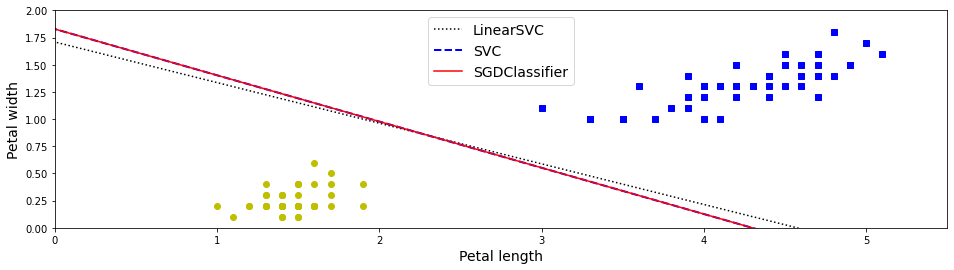

In [9]:
import matplotlib.pyplot as plt
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]
 
# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])
 
# Plot all three decision boundaries
plt.figure(figsize=(16, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
 
plt.show()

From the above graph , we can say that they are almost the same models.

9.On the MNIST dataset, train an SVM classifier. You'll need to use one-versus-the-rest to assign all
10 digits because SVM classifiers are binary classifiers. To accelerate up the process, you might want
to tune the hyperparameters using small validation sets. What level of precision can you achieve?

First and foremost, get the data, split the train set and test set:


try:
    import numpy as np
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
 
X = mnist["data"]
y = mnist["target"]
 
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

Shuffling the training set

import numpy as np
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]

#scaling , traing the data and getting the result of accuracy score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.923 which is equalto 92.3%

10.On the California housing dataset, train an SVM regressor.

On the California housing dataset, an SVM regressor can be trained in the following steps.

Get the data, split into training set and test set, scale the data, train a model, test the model, check the model's RMSE:


import numpy as np
from sklearn.metrics import mean_squared_error
y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9545170440733

#Let's have a look at RMSE
import numpy as np
np.sqrt(mse)

0.9769938812875